In [64]:
from fp2graph import *
from shapely import Polygon
import skimage.measure as meas
from sklearn.cluster import KMeans

In [2]:
PATH = 'plans/fp_ostwald11_f3_2.png'
f = FloorPlan2Graph(PATH)

<module 'matplotlib.pyplot' from '/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/gqenv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

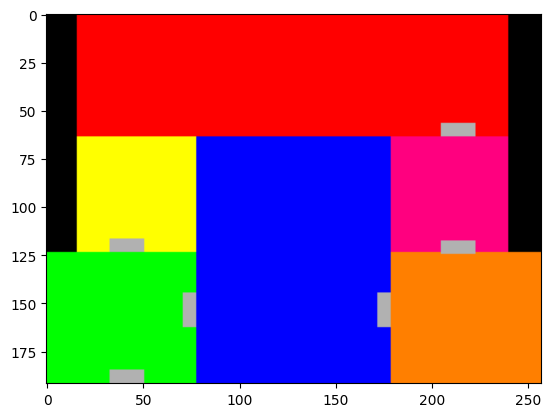

In [3]:
f.image2tensor()
f.view_plan_image()

<module 'matplotlib.pyplot' from '/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/gqenv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

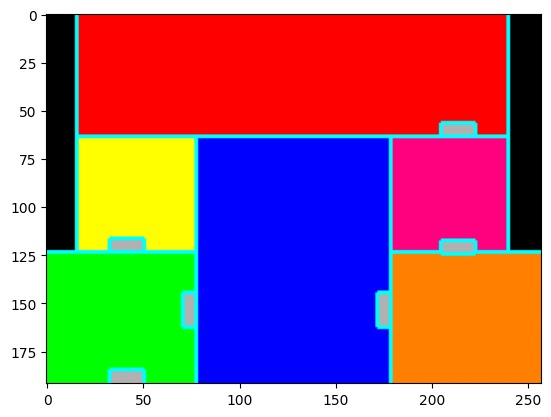

In [4]:
f.segment_tensor()
f.view_plan_segments()

In [5]:
f.tensor_labels

array([[8, 8, 8, ..., 8, 8, 8],
       [8, 8, 8, ..., 8, 8, 8],
       [8, 8, 8, ..., 8, 8, 8],
       ...,
       [6, 6, 6, ..., 5, 5, 5],
       [6, 6, 6, ..., 5, 5, 5],
       [6, 6, 6, ..., 5, 5, 5]], dtype=int8)

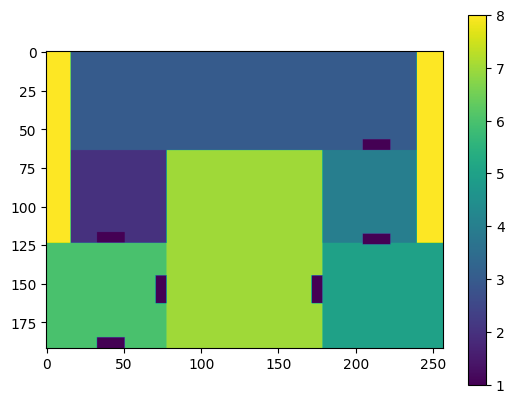

In [6]:
fig, ax = plt.subplots()
im = ax.imshow(f.tensor_labels)
cbar = ax.figure.colorbar(im, )
# plt.bar_label()

In [50]:
f.segment_tensor()
df = f.df
df["Index"] = df.index
df.head()

,R,G,B,Label,Index
0,0,0,0,8,0
1,0,0,0,8,1
2,0,0,0,8,2
3,0,0,0,8,3
4,0,0,0,8,4


In [93]:
len(df)

49344

In [82]:
f.tensor.shape[0:2]

(192, 257)

In [90]:
np.indices(f.tensor.shape[0:2])[0].shape

(192, 257)

In [92]:
np.indices(f.tensor.shape[0:2])[0].reshape(-1).shape

(49344,)

In [95]:
df["X Pos"] = np.indices(f.tensor.shape[0:2])[0].reshape(-1)
df["Y Pos"] = np.indices(f.tensor.shape[0:2])[1].reshape(-1)

In [102]:
mask = (df["X Pos"] == 2) & (df["Y Pos"] == 1)

In [107]:
df.loc[mask]["Label"] = 2

/var/folders/7r/39t1cgb13d57zk26c__2z50m0000gn/T/ipykernel_9243/1207571179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[mask]["Label"] = 2


/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/gqenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


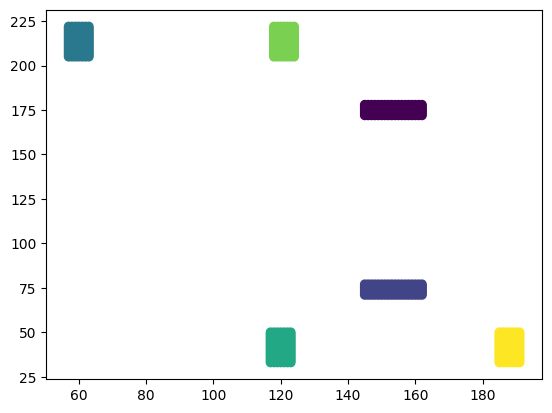

In [72]:
indices_split = np.where(f.tensor_labels == 1)
indices = np.argwhere(f.tensor_labels == 1)
# TODO make this so dont have to get init clusers
kmeans = KMeans(n_clusters=6)
y_pred = kmeans.fit_predict(indices)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(indices_split[0], indices_split[1], c=y_pred)

In [122]:
new_tensor_labels = f.tensor_labels.copy()

In [118]:
np.unique(f.tensor_labels)

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int8)

In [123]:
for x, y, door_label in zip(indices_split[0], indices_split[1], y_pred):
    new_tensor_labels[x,y] = 10+door_label

In [124]:
np.unique(new_tensor_labels)

array([ 2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15], dtype=int8)

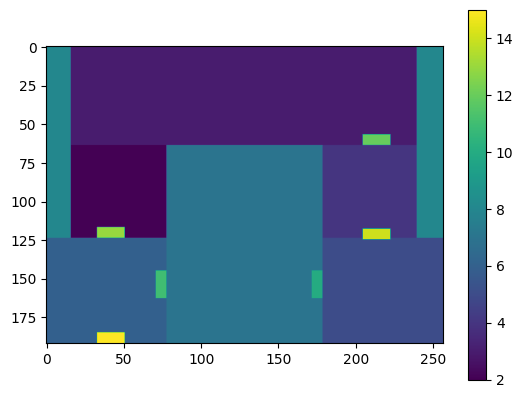

In [125]:
fig, ax = plt.subplots()
im = ax.imshow(new_tensor_labels)
cbar = ax.figure.colorbar(im, )

In [75]:
door_shape = len(indices_split[0])
door_shape

756

In [51]:
df["Label"].unique()

array([8, 3, 1, 2, 7, 4, 6, 5], dtype=int8)

In [55]:
f.tensor_labels.shape

(192, 257)

In [73]:
kmeans.labels_.shape

(756,)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [54]:
# door_count = 0
# door_rows = []
# for ix, row in df.iterrows():
#     if row["Label"] == 1:
#         door_rows.append(row["Index"])
#         df.at[ix, "Label"] = 10
#         if len(door_rows) > 2:
#             if row["Index"] - door_rows[-2] != 1:
#                 print(row["Index"])


In [16]:
df.loc[df["Label"] == 1 ]["R"]

14854    177
14855    177
14856    177
14857    177
14858    177
        ... 
49133    177
49134    177
49135    177
49136    177
49137    177
Name: R, Length: 756, dtype: uint8

In [27]:
# TODO check that they are all non-consecutive in the 2D space..
df.loc[df["Label"] == 1 ]["Index"].diff(1).unique()
# if plotted histogram should have high entries for 1 -

array([       nan, 1.0000e+00, 2.4000e+02, 1.3689e+04, 1.5500e+02,
       6.8000e+01, 5.2460e+03, 9.5000e+01, 1.5000e+02, 5.7660e+03])

In [ ]:
# group by consecutive values.. 
# if label ==1, 
    # label = 10 
# and dif in index !=1 -> door_count+=1, label = door_count + label  

In [33]:
(df.loc[df["Label"] == 1 ]["Index"].diff(1) != 1).astype('int')

14854    1
14855    0
14856    0
14857    0
14858    0
        ..
49133    0
49134    0
49135    0
49136    0
49137    0
Name: Index, Length: 756, dtype: int64

In [ ]:
df['value_grp'] = (df.Values.diff(1) != 0).astype('int').cumsum()


In [ ]:
(df.Values.diff(1) != 0).astype('int').cumsum()

# test 

In [7]:
len(f.regions)

AttributeError: 'FloorPlan2Graph' object has no attribute 'regions'

In [ ]:
# dont want to plot regions with label 8 or 1 with shapely 
all_region_props = meas.regionprops(f.tensor_labels, f.tensor)
all_region_props

In [ ]:
f.regions = f.regions[1:7]

In [ ]:
f.regions

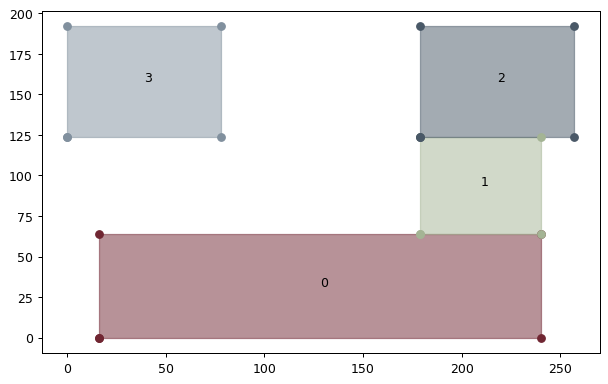

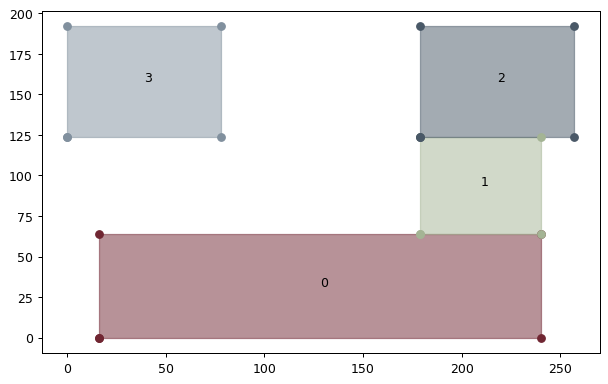

In [ ]:
f.view_plan_shapely()

In [ ]:
# based on image_intensity prop (has to update meas.region_props to recive unlabeled image), can see that 0 and 7 are the regions of interest. with 0 being the doors. although can search after the fact, can also consider dictionary, or including the values in 
all_region_props[7].image_intensity

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
all_region_props[0]?

Type:        RegionProperties
String form: <skimage.measure._regionprops.RegionProperties object at 0x122791a60>
File:        ~/_UILCode/gqe-phd/gqenv/lib/python3.9/site-packages/skimage/measure/_regionprops.py
Docstring:  
Please refer to `skimage.measure.regionprops` for more information
on the available region properties.


IndexError: list index out of range

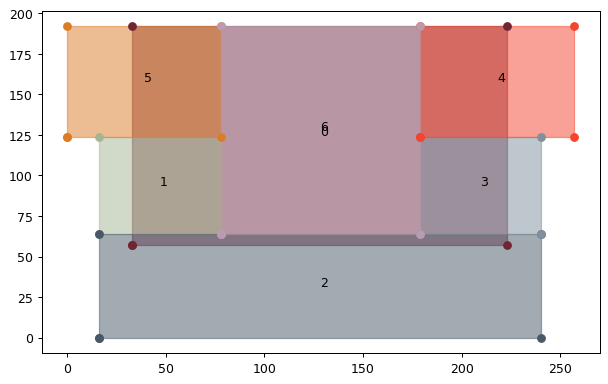

In [ ]:
f.array2shapely()
_ = f.view_plan_shapely()